# MWLR Pipeline: Visualisation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports-and-Defaults" data-toc-modified-id="Imports-and-Defaults-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and Defaults</a></span></li></ul></div>

## Imports and Defaults

In [1]:
from IPython.core.display import display, HTML, Markdown as md
display(HTML("""<style>.container { width:80% !important; } p, ul {max-width:␣
,→40em;} .rendered_html table { margin-left: 0; } .output_subarea.output_png {␣
,→display: flex; justify-content: center;}</style>"""))

In [2]:
import pandas as pd
import numpy as np

import os

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

import spacy
import en_core_web_lg
nlp_lg = spacy.load('en_core_web_lg')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
# import matplotlib.patches as mpatches
# import plotly.express as px
from pylab import rcParams

%matplotlib inline
# rcParams['figure.figsize'] = 10, 7

# %matplotlib inline
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
relations = pd.read_csv('workingDataset.csv', index_col=0, dtype={'Tagged_Relationship': 'int8'})
col_to_downcast=[col for col in relations.columns if relations[col].dtype==int]
relations[col_to_downcast]=relations[col_to_downcast].apply(pd.to_numeric, downcast='integer')
cols= list(relations.columns)
cols.remove('Tagged_Relationship')
cols.append('Tagged_Relationship')
relations=relations[cols]

In [8]:
relations

,Species,Start_Token_Species,End_Token_Species,Start_Index_Species,End_Index_Species,Sentence_Species,inAbstract300_Species,inAbstract500_Species,max_TFISF_Species,Sent_Start_Species,...,sqrt_max_TFISF_Location,sqrt_Num_Tokens_Between,sqrt_Num_Words_Between,sqrt_Num_Verbs_Between,sqrt_Num_Nouns_Between,sqrt_Num_Preps_Between,log_max_TFISF_Species,log_max_TFISF_Location,log_Num_Verbs_Between,Tagged_Relationship
0,Hemichloris antarctica,2566,2568,13939,13961,Free-living algal cells resembling Hemichloris...,0,0,4.267364,0,...,1.849342,50.537115,43.783559,14.764823,24.596748,15.459625,1.661530,1.486155,5.389072,0
1,Hemichloris antarctica,2566,2568,13939,13961,Free-living algal cells resembling Hemichloris...,0,0,4.267364,0,...,1.849342,50.517324,43.772137,14.764823,24.596748,15.459625,1.661530,1.486155,5.389072,0
2,Hemichloris antarctica,2566,2568,13939,13961,Free-living algal cells resembling Hemichloris...,0,0,4.267364,0,...,2.316458,49.839743,43.474130,14.628739,24.596748,15.427249,1.661530,1.850968,5.370638,0
3,Hemichloris antarctica,2566,2568,13939,13961,Free-living algal cells resembling Hemichloris...,0,0,4.267364,0,...,2.316458,49.829710,43.462628,14.628739,24.596748,15.427249,1.661530,1.850968,5.370638,0
4,Hemichloris antarctica,2566,2568,13939,13961,Free-living algal cells resembling Hemichloris...,0,0,4.267364,0,...,1.849342,49.719212,43.347434,14.594520,24.556058,15.362291,1.661530,1.486155,5.365976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21413,L. frigida,9081,9083,47612,47622,"Particularly, the clade of L. frigida is compo...",0,0,4.679040,0,...,1.490740,31.921779,28.089144,8.944272,14.764823,11.045361,1.736782,1.170097,4.394449,0
21414,L. frigida,9081,9083,47612,47622,"Particularly, the clade of L. frigida is compo...",0,0,4.679040,0,...,1.490740,32.526912,28.705400,9.055385,15.165751,11.401754,1.736782,1.170097,4.418841,0
21415,L. frigida,9081,9083,47612,47622,"Particularly, the clade of L. frigida is compo...",0,0,4.679040,0,...,1.490740,33.015148,29.189039,9.219544,15.459625,11.532563,1.736782,1.170097,4.454347,0
21416,L. frigida,9081,9083,47612,47622,"Particularly, the clade of L. frigida is compo...",0,0,4.679040,0,...,1.490740,33.376639,29.563491,9.327379,15.652476,11.747340,1.736782,1.170097,4.477337,0


In [195]:
relations.Document.unique()

array(['Archer2017_Article_EndolithicMicrobialDiversityIn',
       'fmicb-07-01642',
       'summer-activity-patterns-for-mosses-and-lichens-in-maritime-antarctica',
       's42003-018-0260-y',
       'Fraser2018_Article_EvidenceOfPlantAndAnimalCommun', 'source',
       'fmicb-10-01018'], dtype=object)

In [24]:
relations[(relations.Document =='Archer2017_Article_EndolithicMicrobialDiversityIn')&(relations.Tagged_Relationship ==1)])

11

In [29]:
len(relations[(relations.Document =='Archer2017_Article_EndolithicMicrobialDiversityIn')&(relations.Tagged_Relationship ==1)&(relations.Same_Sentence ==0)])

2

In [68]:
relations[(relations.Document =='Archer2017_Article_EndolithicMicrobialDiversityIn')].Species.unique()

array(['Hemichloris antarctica', 'Leptolyngbya', 'Diplosphaera sp.',
       'Trebouxia', 'Lecidea', 'Nitrososphaera gargensis',
       'Chroococcidiopsis', 'Diplosphaera', 'Hemichloris'], dtype=object)

In [67]:
relations[relations.Document =='Archer2017_Article_EndolithicMicrobialDiversityIn']['End_Token_Species'].unique().sum() - relations[relations.Document =='Archer2017_Article_EndolithicMicrobialDiversityIn']['Start_Token_Species'].unique().sum() 

18

In [190]:
DocNum = []
Name = []
Possible_Relationships = []
TrueRelationships =[]
LengthTokens = []
LengthChars= []
SpeciesMentions = []
UniqueSpecies =[]
LocationMentions = []
UniqueLocations = []
Sentences = []
SpeciesTokens = []
LocationTokens = []

for i, document in enumerate(relations.Document.unique(), 1):
    DocNum.append('Document ' + str(i))
    Name.append(document)
    Possible_Relationships.append(len(relations[relations.Document ==document]))
    TrueRelationships.append(len(relations[(relations.Document ==document)&(relations.Tagged_Relationship ==1)]))
    SpeciesMentions.append(len(relations[relations.Document ==document]['Start_Token_Species'].unique()))
    UniqueSpecies.append(len(relations[relations.Document ==document]['Species'].unique()))
    UniqueLocations.append(len(relations[relations.Document ==document]['Location'].unique()))
    LocationMentions.append(len(relations[relations.Document ==document]['Start_Token_Location'].unique()))
    filename = document+'.txt'
    file = open('FraserSet/BodyOnly/Clean/'+filename)
    textfile = file.read()
    file.close()
    LengthChars.append(len(textfile))
    doc = nlp_lg(textfile)
    LengthTokens.append(len(doc))
    Sentences.append(len([1 for sent in doc.sents]))
    SpeciesTokens.append(relations[relations.Document ==document]['End_Token_Species'].unique().sum() - 
                         relations[relations.Document ==document]['Start_Token_Species'].unique().sum())
    LocationTokens.append(relations[relations.Document ==document]['End_Token_Location'].unique().sum() - 
                         relations[relations.Document ==document]['Start_Token_Location'].unique().sum())

DocNum.append('Total')
for list in [Possible_Relationships, TrueRelationships, LengthTokens, LengthChars, 
             SpeciesMentions, UniqueSpecies, LocationMentions, UniqueLocations, Sentences, 
             SpeciesTokens, LocationTokens]:
    list.append(sum(list))

RelationshipPerc = [np.round(100*x/y,3) for x, y in zip(TrueRelationships,Possible_Relationships)]
SpeciesPerc = [np.round(100*x/y,3) for x, y in zip(SpeciesTokens,LengthTokens)]
LocationPerc = [np.round(100*x/y,3) for x, y in zip(LocationTokens,LengthTokens)]
    
Summary = pd.DataFrame({'DocNum':DocNum,
                        'Sentences': Sentences, 
                        'Tokens':LengthTokens, 'Characters': LengthChars,
                        'Species Mentions':SpeciesMentions, 'Species %':SpeciesPerc, 'Location Mentions':LocationMentions,
                        'Location %': LocationPerc, 'Unique Species':UniqueSpecies, 
                        'Unique Locations':UniqueLocations,'Possible Relationships': Possible_Relationships,
                        'True Relationships': TrueRelationships, 'Relationship %': RelationshipPerc
                       })

In [191]:
Summary

,DocNum,Sentences,Tokens,Characters,Species Mentions,Species %,Location Mentions,Location %,Unique Species,Unique Locations,Possible Relationships,True Relationships,Relationship %
0,Document 1,214,5120,28657,12,0.352,96,3.379,9,25,1152,11,0.955
1,Document 2,252,7192,40167,13,0.209,87,1.961,8,33,1131,12,1.061
2,Document 3,335,8779,45059,55,1.333,138,2.939,28,33,7590,48,0.632
3,Document 4,194,5524,32034,92,1.756,35,0.833,8,22,3220,11,0.342
4,Document 5,82,2387,12857,3,0.209,64,4.650,3,29,192,4,2.083
5,Document 6,143,4212,23542,8,0.380,31,1.068,3,20,248,3,1.210
6,Document 7,323,10823,57358,83,0.942,95,1.515,29,27,7885,40,0.507
7,Total,1543,44037,239674,266,0.840,546,2.130,88,189,21418,129,0.602


In [ ]:
relations[(relations.Document ==document)&(relations.Tagged_Relationship ==1)]

In [31]:
DocNum = []
Name = []
Possible_Relationships = []
TrueRelationships =[]
LengthTokens = []
LengthChars= []
SpeciesMentions = []
UniqueSpecies =[]
LocationMentions = []
UniqueLocations = []
Sentences = []
SpeciesTokens = []
LocationTokens = []
InterSentRelationships = []


for i, document in enumerate(relations.Document.unique(), 1):
    DocNum.append('Document ' + str(i))
    Name.append(document)
    Possible_Relationships.append(len(relations[relations.Document ==document]))
    TrueRelationships.append(len(relations[(relations.Document ==document)&(relations.Tagged_Relationship ==1)]))
    SpeciesMentions.append(len(relations[relations.Document ==document]['Start_Token_Species'].unique()))
    UniqueSpecies.append(len(relations[relations.Document ==document]['Species'].unique()))
    UniqueLocations.append(len(relations[relations.Document ==document]['Location'].unique()))
    LocationMentions.append(len(relations[relations.Document ==document]['Start_Token_Location'].unique()))
    InterSentRelationships.append(len(relations[(relations.Document ==document)&(relations.Tagged_Relationship ==1)&(relations.Same_Sentence ==0)]))
    filename = document+'.txt'
    file = open('FraserSet/BodyOnly/Clean/'+filename)
    textfile = file.read()
    file.close()
    LengthChars.append(len(textfile))
    doc = nlp_lg(textfile)
    LengthTokens.append(len(doc))
    Sentences.append(len([1 for sent in doc.sents]))
    SpeciesTokens.append(relations[relations.Document ==document]['End_Token_Species'].unique().sum() - 
                         relations[relations.Document ==document]['Start_Token_Species'].unique().sum())
    LocationTokens.append(relations[relations.Document ==document]['End_Token_Location'].unique().sum() - 
                         relations[relations.Document ==document]['Start_Token_Location'].unique().sum())

DocNum.append('Total')
for list in [Possible_Relationships, TrueRelationships, LengthTokens, LengthChars, 
             SpeciesMentions, UniqueSpecies, LocationMentions, UniqueLocations, Sentences, 
             SpeciesTokens, LocationTokens, InterSentRelationships]:
    list.append(sum(list))

RelationshipPerc = [np.round(100*x/y,3) for x, y in zip(TrueRelationships,Possible_Relationships)]
SpeciesPerc = [np.round(100*x/y,3) for x, y in zip(SpeciesTokens,LengthTokens)]
LocationPerc = [np.round(100*x/y,3) for x, y in zip(LocationTokens,LengthTokens)]
CrossSentRelPerc = [np.round(100*x/y,3) for x, y in zip(InterSentRelationships,TrueRelationships)]
    
Summary2 = pd.DataFrame({'DocNum':DocNum,
                        'Sentences': Sentences, 
                        'Tokens':LengthTokens, 'Characters': LengthChars,
                        'Species Mentions':SpeciesMentions, 'Species %':SpeciesPerc, 'Location Mentions':LocationMentions,
                        'Location %': LocationPerc, 'Unique Species':UniqueSpecies, 
                        'Unique Locations':UniqueLocations,'Possible Relationships': Possible_Relationships,
                        'True Relationships': TrueRelationships, 'Relationship %': RelationshipPerc, 'Cross Sentence Relationships %':CrossSentRelPerc
                       })

In [32]:
Summary2

,DocNum,Sentences,Tokens,Characters,Species Mentions,Species %,Location Mentions,Location %,Unique Species,Unique Locations,Possible Relationships,True Relationships,Relationship %,Cross Sentence Relationships %
0,Document 1,214,5120,28657,12,0.352,96,3.379,9,25,1152,11,0.955,18.182
1,Document 2,252,7192,40167,13,0.209,87,1.961,8,33,1131,12,1.061,100.000
2,Document 3,335,8779,45059,55,1.333,138,2.939,28,33,7590,48,0.632,87.500
3,Document 4,194,5524,32034,92,1.756,35,0.833,8,22,3220,11,0.342,90.909
4,Document 5,82,2387,12857,3,0.209,64,4.650,3,29,192,4,2.083,0.000
5,Document 6,143,4212,23542,8,0.380,31,1.068,3,20,248,3,1.210,100.000
6,Document 7,323,10823,57358,83,0.942,95,1.515,29,27,7885,40,0.507,70.000
7,Total,1543,44037,239674,266,0.840,546,2.130,88,189,21418,129,0.602,75.194


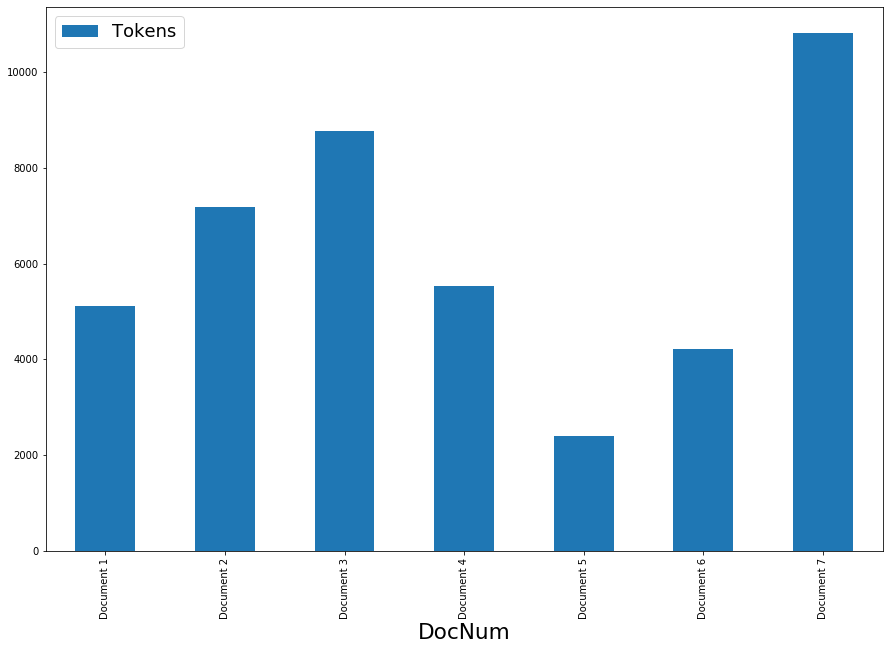

In [103]:
ax = Summary[0:7].plot.bar(x='DocNum', y='Tokens')
# ax.x

Text(0.5, 0, 'Document')

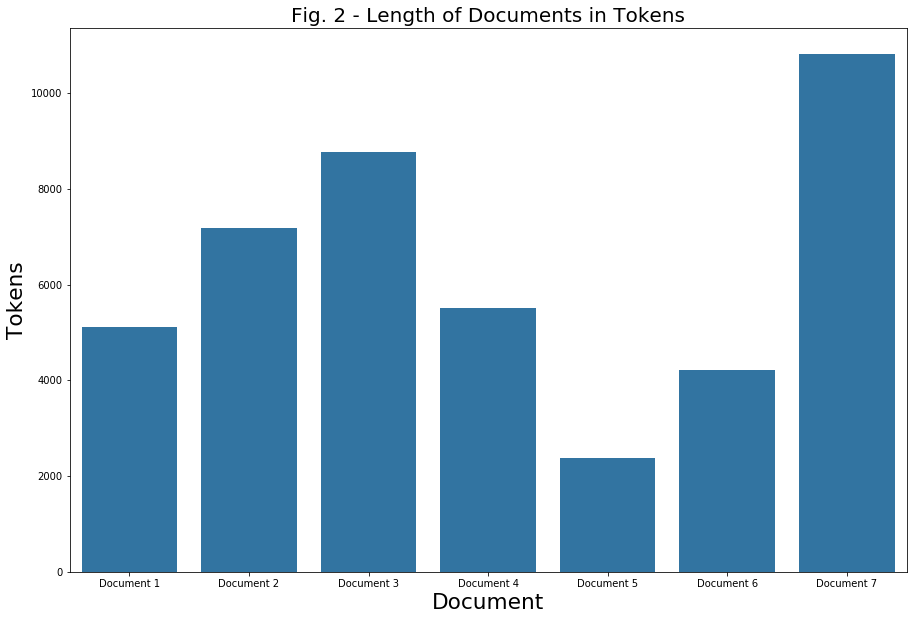

In [243]:
ax = sns.barplot(x='DocNum', y='Tokens', data=Summary[0:7], color='tab:blue')
ax.set_title('Fig. 2 - Length of Documents in Tokens')
ax.set_xlabel('Document')
# ax.set_ylabel()

Text(0.5, 0, 'Document')

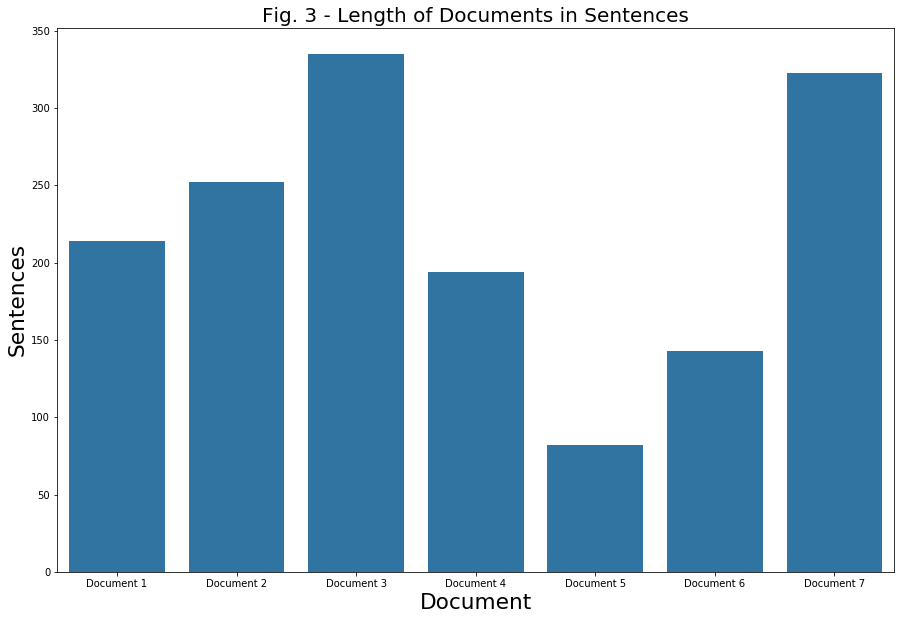

In [244]:
ax = sns.barplot(x='DocNum', y='Sentences', data=Summary[0:7], color='tab:blue')
ax.set_title('Fig. 3 - Length of Documents in Sentences')
ax.set_xlabel('Document')
# ax.set_ylabel()

Text(0.5, 0, 'Document')

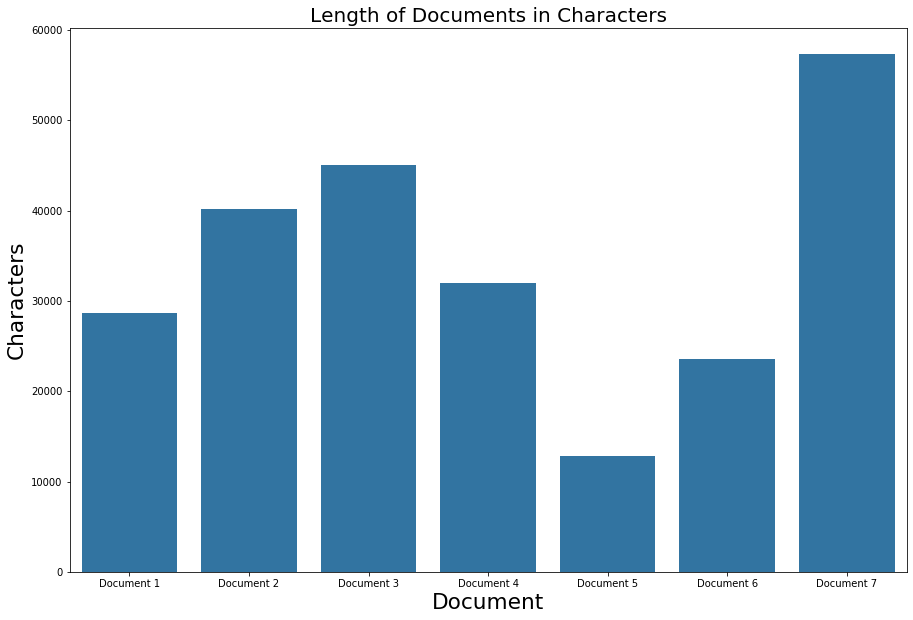

In [140]:
ax = sns.barplot(x='DocNum', y='Characters', data=Summary[0:7], color='tab:blue')
ax.set_title('Length of Documents in Characters')
ax.set_xlabel('Document')

Text(0, 0.5, 'Percentage')

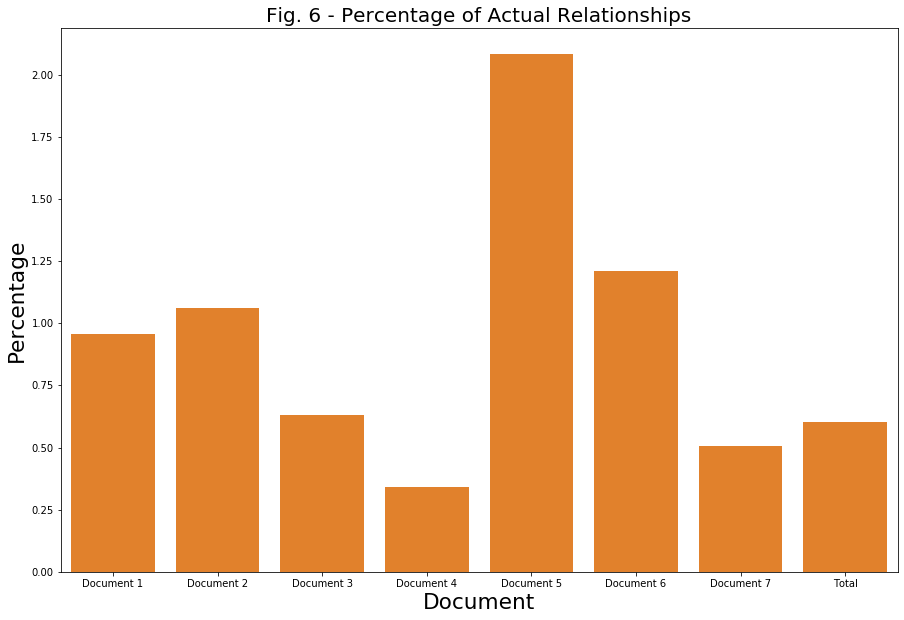

In [247]:
ax = sns.barplot(x='DocNum', y='Relationship %', data=Summary, color='tab:orange')
ax.set_title('Fig. 6 - Percentage of Actual Relationships')
ax.set_xlabel('Document')
ax.set_ylabel('Percentage')

In [193]:
df = Summary[['DocNum','Species %', 'Location %']]
df.columns = ['DocNum','Species', 'Location']
df = df.melt('DocNum', var_name='Entity', value_name='Vals')

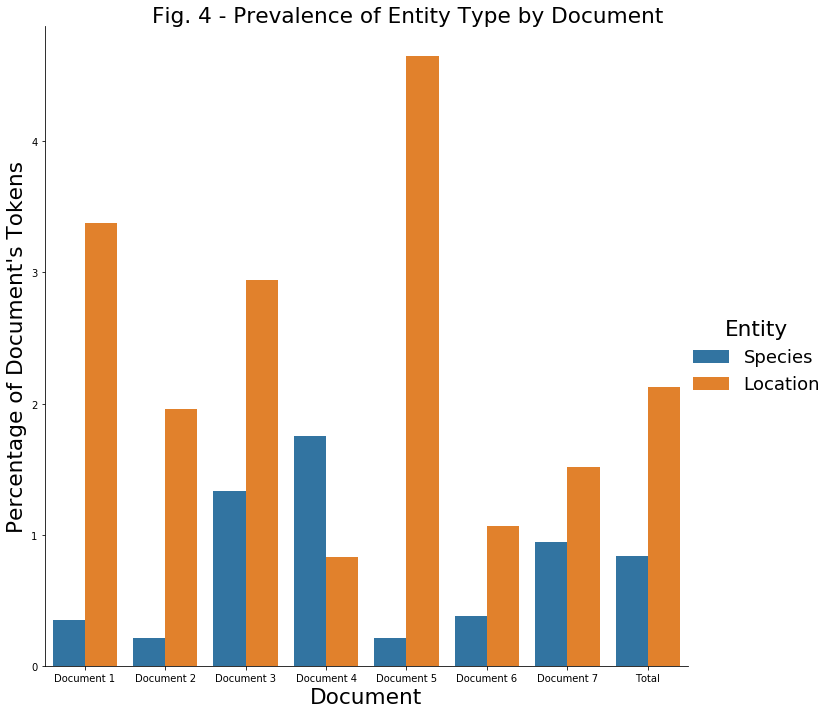

In [245]:
ax = sns.catplot(x = 'DocNum', y='Vals', hue='Entity', data = df, kind = 'bar', height=10, 
#             legend_out=True
           )
# ax = plt.gca()
ax.fig.suptitle('Fig. 4 - Prevalence of Entity Type by Document', y=1)
# ax.set_title('Prevalence of Entity Type')
# ax.set_xlabel('Document')
# ax.set_ylabel("Percentage of Document's Tokens")
ax.set_axis_labels("Document", "Percentage of Document's Tokens")


In [151]:
handles

[<BarContainer object of 8 artists>, <BarContainer object of 8 artists>]

Text(0.5, 0, 'True Relationship')

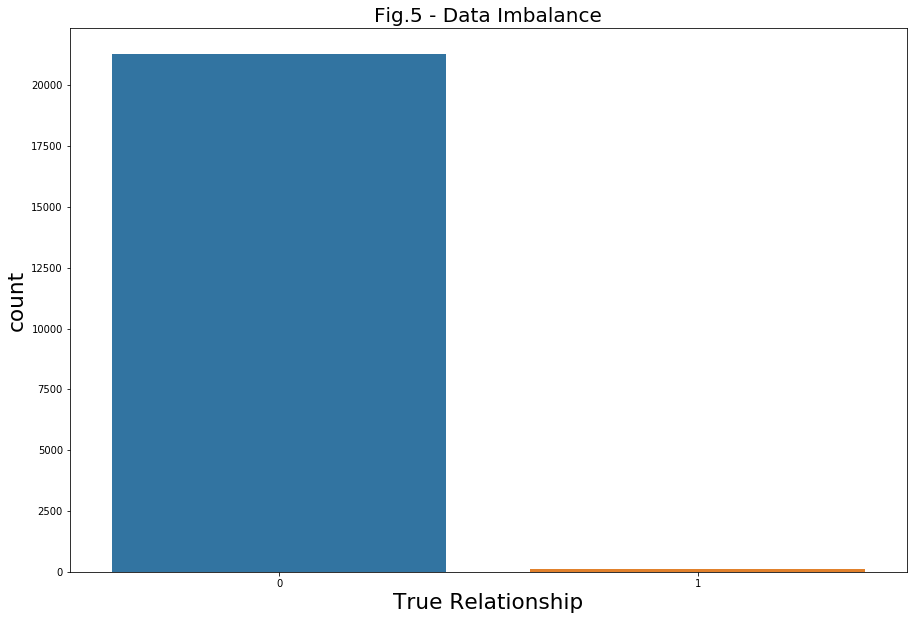

In [246]:
plt = sns.countplot(x="Tagged_Relationship", data=relations)
plt.set_title('Fig.5 - Data Imbalance')
plt.set_xlabel('True Relationship')
# plt.xticks([0,1]['No', 'Yes'])

[[Text(0, 0, 'Across Sentence Boundary'), Text(0, 0, 'Within Sentence')]]

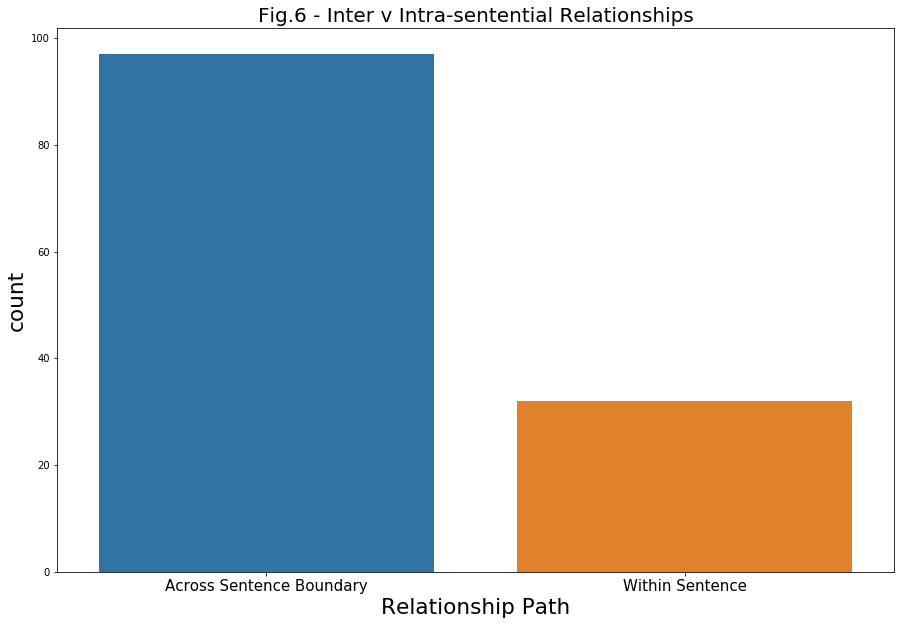

In [24]:
rcParams['xtick.labelsize'] = 15
plt = sns.countplot(x="Same_Sentence", data=relations[relations.Tagged_Relationship==1])
plt.set_title('Fig.6 - Inter v Intra-sentential Relationships')
plt.set_xlabel('Relationship Path')
# plt.xticks([0,1]['No', 'Yes'])
plt.set(xticklabels=['Across Sentence Boundary', 'Within Sentence'])
# =['Across Sentence Boundary', 'Within Sentence'])